# **Código de Limpieza de Datos - Proyecto de Grado 2025-1**
## **Identificación de contratos públicos sujetos a adiciones en el sector de la salud con modelos de machine learning**

### **Elaborado por:**  
#### Marco Antonio Cruz y Paula Andrea Ovalle
m.cruzg@uniandes.edu.co-202020941 y P.ovallev@uniandes.edu.co-202021735



## Librerias y carga csv

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
#### Activar segun quien trabaje 
#Marco
Filepath = "C:/Users/user/OneDrive/Documentos/semestres uniandes/Clases 2025-1/Tesis IIND/Solo sector salud/Base final.csv"
#Paula
#Filepath=
df=pd.read_csv(Filepath)
df

C:\Users\user\AppData\Local\Temp\ipykernel_24464\1514215298.py:6: DtypeWarning: Columns (71) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(Filepath)


,nombre entidad,nit entidad,departamento,ciudad,localización,orden,sector,rama,entidad centralizada,proceso de compra,...,departamento proveedor,ciudad proveedor,fecha adjudicacion,valor total adjudicacion,nombre del adjudicador,nombre del proveedor adjudicado,estado de apertura del proceso,subtipo de contrato,estado resumen,Adicion
0,UESVALLE,805018833,Valle del Cauca,Cali,Colombia Valle del Cauca Cali,Territorial,Salud y Protección Social,Ejecutivo,Centralizada,CO1.BDOS.3116030,...,Valle del Cauca,Florida,NaN,0,No Adjudicado,ALVARO JAVIER TIGREROS HURTADO,Abierto,No Definido,Adjudicado,1
1,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,900971006,Distrito Capital de Bogotá,No Definido,Colombia Bogotá No Definido,Territorial,Salud y Protección Social,Corporación Autónoma,Descentralizada,CO1.BDOS.2328666,...,Distrito Capital de Bogotá,Bogotá,NaN,0,No Adjudicado,Camilo Alonso Peralta,Abierto,No Definido,Adjudicado,1
2,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,900959048,Distrito Capital de Bogotá,No Definido,Colombia Bogotá No Definido,Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.7179284,...,Distrito Capital de Bogotá,No Definido,NaN,0,No Adjudicado,FABIOLA VANEGAS PORRAS,Abierto,No Definido,Adjudicado,1
3,UNIDAD PRESTADORA DE SALUD ATLANTICO,9013620904,Atlántico,Soledad,Colombia Atlántico Soledad,Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.5872894,...,Atlántico,Barranquilla,04/16/2024,54000000,TATIANA CATALAN RIPOLL,ANDRES FELIPE MANJARRES MOLINA,Cerrado,No Definido,Adjudicado,1
4,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,900971006,Distrito Capital de Bogotá,No Definido,Colombia Bogotá No Definido,Territorial,Salud y Protección Social,Corporación Autónoma,Descentralizada,CO1.BDOS.414925,...,Distrito Capital de Bogotá,No Definido,NaN,0,No Adjudicado,Andrea Carolina Noches Buelvas,Abierto,No Definido,Adjudicado,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594512,RED SALUD CASANARE E.S.E. *,8440041972,Casanare,Yopal,Colombia Casanare Yopal,Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.5079011,...,Casanare,Villanueva,NaN,0,No Adjudicado,lida Marcela martinez,Abierto,No Definido,Adjudicado,0
594513,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,900959048,Distrito Capital de Bogotá,No Definido,Colombia Bogotá No Definido,Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.1053876,...,Cundinamarca,No Definido,NaN,0,No Adjudicado,YAMILY CIRO MARIN,Abierto,No Definido,Adjudicado,1
594514,ICBF REGIONAL NARIÑO,899999239,Nariño,No Definido,Colombia Nariño No Definido,Nacional,Salud y Protección Social,Ejecutivo,Centralizada,CO1.BDOS.6359883,...,Nariño,Pasto,NaN,0,No Adjudicado,HUMBERTO JAVIER PALACIOS ORDOÑEZ,Abierto,No Definido,Adjudicado,0
594515,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,900959048,Distrito Capital de Bogotá,No Definido,Colombia Bogotá No Definido,Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.7401171,...,Distrito Capital de Bogotá,Bogotá,NaN,0,No Adjudicado,WILLIAM DAVID ARREGOCES FERNANDEZ,Abierto,No Definido,Adjudicado,0


In [36]:
print(list(df.columns))

['nombre entidad', 'nit entidad', 'departamento', 'ciudad', 'localización', 'orden', 'sector', 'rama', 'entidad centralizada', 'proceso de compra', 'id contrato', 'estado contrato', 'codigo de categoria principal', 'tipo de contrato', 'modalidad de contratacion', 'justificacion modalidad de contratacion', 'fecha de firma', 'fecha de inicio del contrato', 'fecha de fin del contrato', 'fecha de inicio de ejecucion', 'fecha de fin de ejecucion', 'condiciones de entrega', 'es grupo', 'es pyme', 'habilita pago adelantado', 'liquidación', 'obligación ambiental', 'obligaciones postconsumo', 'reversion', 'origen de los recursos', 'destino gasto', 'valor del contrato', 'valor de pago adelantado', 'valor facturado', 'valor pendiente de pago', 'valor pagado', 'valor amortizado', 'valor pendiente de amortizacion', 'valor pendiente de ejecucion', 'estado bpin', 'código bpin', 'anno bpin', 'saldo cdp', 'saldo vigencia', 'espostconflicto', 'dias adicionados', 'puntos del acuerdo', 'pilares del acuerd

## Eliminar columnas vacias y correción de nombre V.respuesta

In [37]:
# Contar valores nulos por columna
nulos = df.isnull().sum()
print(nulos)


nombre entidad                     0
nit entidad                        0
departamento                       0
ciudad                             0
localización                       0
                                  ..
nombre del proveedor adjudicado    8
estado de apertura del proceso     0
subtipo de contrato                0
estado resumen                     0
Adicion                            0
Length: 105, dtype: int64


In [38]:
# Porcentaje de valores nulos
porcentaje_nulos = df.isnull().mean() * 100
print(porcentaje_nulos)


nombre entidad                     0.000000
nit entidad                        0.000000
departamento                       0.000000
ciudad                             0.000000
localización                       0.000000
                                     ...   
nombre del proveedor adjudicado    0.001346
estado de apertura del proceso     0.000000
subtipo de contrato                0.000000
estado resumen                     0.000000
Adicion                            0.000000
Length: 105, dtype: float64


In [39]:
# Umbral de eliminación (40% de valores nulos) de 0.1 a 0.40 son los mismos y solo el 20% ya son casi 120.000 columnas que tocaria eliminar
threshold = 0.4

# Identificar columnas con más del 40% de valores nulos
columnas_eliminadas = df.columns[df.isnull().mean() >= threshold]

# Imprimir columnas eliminadas
print("Columnas eliminadas por tener demasiados valores nulos:")
print(columnas_eliminadas)

# Eliminar las columnas del DataFrame
df = df[df.columns[df.isnull().mean() < threshold]]


Columnas eliminadas por tener demasiados valores nulos:
Index(['fecha de inicio de ejecucion', 'fecha de fin de ejecucion',
       'ultima actualizacion', 'fecha inicio liquidacion',
       'fecha fin liquidacion', 'fecha de notificación de prorrogación',
       'fecha de publicacion (manifestacion de interes)',
       'fecha de publicacion (fase borrador)',
       'fecha de recepcion de respuestas', 'fecha de apertura de respuesta',
       'fecha de apertura efectiva', 'fecha adjudicacion'],
      dtype='object')


In [40]:
df

,nombre entidad,nit entidad,departamento,ciudad,localización,orden,sector,rama,entidad centralizada,proceso de compra,...,id adjudicacion,departamento proveedor,ciudad proveedor,valor total adjudicacion,nombre del adjudicador,nombre del proveedor adjudicado,estado de apertura del proceso,subtipo de contrato,estado resumen,Adicion
0,UESVALLE,805018833,Valle del Cauca,Cali,Colombia Valle del Cauca Cali,Territorial,Salud y Protección Social,Ejecutivo,Centralizada,CO1.BDOS.3116030,...,No Adjudicado,Valle del Cauca,Florida,0,No Adjudicado,ALVARO JAVIER TIGREROS HURTADO,Abierto,No Definido,Adjudicado,1
1,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,900971006,Distrito Capital de Bogotá,No Definido,Colombia Bogotá No Definido,Territorial,Salud y Protección Social,Corporación Autónoma,Descentralizada,CO1.BDOS.2328666,...,No Adjudicado,Distrito Capital de Bogotá,Bogotá,0,No Adjudicado,Camilo Alonso Peralta,Abierto,No Definido,Adjudicado,1
2,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,900959048,Distrito Capital de Bogotá,No Definido,Colombia Bogotá No Definido,Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.7179284,...,No Adjudicado,Distrito Capital de Bogotá,No Definido,0,No Adjudicado,FABIOLA VANEGAS PORRAS,Abierto,No Definido,Adjudicado,1
3,UNIDAD PRESTADORA DE SALUD ATLANTICO,9013620904,Atlántico,Soledad,Colombia Atlántico Soledad,Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.5872894,...,CO1.AWD.1899212,Atlántico,Barranquilla,54000000,TATIANA CATALAN RIPOLL,ANDRES FELIPE MANJARRES MOLINA,Cerrado,No Definido,Adjudicado,1
4,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,900971006,Distrito Capital de Bogotá,No Definido,Colombia Bogotá No Definido,Territorial,Salud y Protección Social,Corporación Autónoma,Descentralizada,CO1.BDOS.414925,...,No Adjudicado,Distrito Capital de Bogotá,No Definido,0,No Adjudicado,Andrea Carolina Noches Buelvas,Abierto,No Definido,Adjudicado,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594512,RED SALUD CASANARE E.S.E. *,8440041972,Casanare,Yopal,Colombia Casanare Yopal,Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.5079011,...,No Adjudicado,Casanare,Villanueva,0,No Adjudicado,lida Marcela martinez,Abierto,No Definido,Adjudicado,0
594513,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,900959048,Distrito Capital de Bogotá,No Definido,Colombia Bogotá No Definido,Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.1053876,...,No Adjudicado,Cundinamarca,No Definido,0,No Adjudicado,YAMILY CIRO MARIN,Abierto,No Definido,Adjudicado,1
594514,ICBF REGIONAL NARIÑO,899999239,Nariño,No Definido,Colombia Nariño No Definido,Nacional,Salud y Protección Social,Ejecutivo,Centralizada,CO1.BDOS.6359883,...,No Adjudicado,Nariño,Pasto,0,No Adjudicado,HUMBERTO JAVIER PALACIOS ORDOÑEZ,Abierto,No Definido,Adjudicado,0
594515,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,900959048,Distrito Capital de Bogotá,No Definido,Colombia Bogotá No Definido,Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.7401171,...,No Adjudicado,Distrito Capital de Bogotá,Bogotá,0,No Adjudicado,WILLIAM DAVID ARREGOCES FERNANDEZ,Abierto,No Definido,Adjudicado,0


## Remover duplicados y columnas que no funcionan desde el inicio

In [41]:
# Contar duplicados antes de eliminarlos
duplicates = len(df[df.duplicated()])
print(f'antes de remover: {duplicates}')

# Eliminar filas duplicadas
df = df.drop_duplicates()

# Contar duplicados después de eliminarlos
duplicates_after = len(df[df.duplicated()])
print(f'despues de remover: {duplicates_after}')

## Se removieron los duplicados antes de hacer el join con adicion por eso ahora no hay y la base paso de mas de 620.000 a lo de ahora

antes de remover: 0
despues de remover: 0


In [42]:
print(list(df.columns))

['nombre entidad', 'nit entidad', 'departamento', 'ciudad', 'localización', 'orden', 'sector', 'rama', 'entidad centralizada', 'proceso de compra', 'id contrato', 'estado contrato', 'codigo de categoria principal', 'tipo de contrato', 'modalidad de contratacion', 'justificacion modalidad de contratacion', 'fecha de firma', 'fecha de inicio del contrato', 'fecha de fin del contrato', 'condiciones de entrega', 'es grupo', 'es pyme', 'habilita pago adelantado', 'liquidación', 'obligación ambiental', 'obligaciones postconsumo', 'reversion', 'origen de los recursos', 'destino gasto', 'valor del contrato', 'valor de pago adelantado', 'valor facturado', 'valor pendiente de pago', 'valor pagado', 'valor amortizado', 'valor pendiente de amortizacion', 'valor pendiente de ejecucion', 'estado bpin', 'código bpin', 'anno bpin', 'saldo cdp', 'saldo vigencia', 'espostconflicto', 'dias adicionados', 'puntos del acuerdo', 'pilares del acuerdo', 'nombre representante legal', 'nacionalidad representante

### eliminacion de variables no necesarias desde el inicio

In [43]:
df = df.drop('localización', axis=1)
df = df.drop('id contrato', axis=1)
df = df.drop('proceso de compra', axis=1)
df = df.drop('id del proceso', axis=1)
df = df.drop('id del portafolio', axis=1)
df = df.drop('sector', axis=1)
df = df.drop('nit entidad', axis=1)

In [44]:
# Definir el umbral
threshold = 0.99  # 99% de valores iguales

# Identificar columnas con 99% o más valores iguales
columnas_iguales = [col for col in df.columns if df[col].value_counts(normalize=True, dropna=False).values[0] >= threshold]

# Imprimir columnas con valores repetidos en 99% o más de los casos
print("Columnas con 99% o más de valores iguales:")
print(columnas_iguales)

df = df.drop(columns=columnas_iguales)

Columnas con 99% o más de valores iguales:
['proveedores invitados', 'proveedores con invitacion directa', 'proveedores que manifestaron interes', 'respuestas externas', 'conteo de respuestas a ofertas', 'estado del procedimiento', 'subtipo de contrato', 'estado resumen']


### Creacion de duracion de contratos e eliminacion de fechas

In [45]:
# Asegurarse de que las columnas de fechas están en formato datetime
df['fecha de inicio del contrato'] = pd.to_datetime(df['fecha de inicio del contrato'], errors='coerce')
df['fecha de fin del contrato'] = pd.to_datetime(df['fecha de fin del contrato'], errors='coerce')

# Calcular la duración en días y crear la nueva columna
df['tiempo duracion (dias)'] = (df['fecha de fin del contrato'] - df['fecha de inicio del contrato']).dt.days



# Verificar el resultado
print(df[['fecha de inicio del contrato', 'fecha de fin del contrato', 'tiempo duracion (dias)']])

df = df.drop('fecha de inicio del contrato', axis=1)
df = df.drop('fecha de fin del contrato', axis=1)

       fecha de inicio del contrato fecha de fin del contrato  \
0                               NaT                       NaT   
1                        2021-10-28                2022-01-31   
2                        2024-12-14                2025-04-09   
3                        2024-04-20                2024-09-30   
4                        2018-05-02                2018-07-31   
...                             ...                       ...   
594512                   2023-10-23                2023-11-22   
594513                   2020-02-01                2021-01-31   
594514                   2024-07-09                2024-12-31   
594515                   2025-02-01                2025-05-31   
594516                   2020-02-01                2020-04-03   

        tiempo duracion (dias)  
0                          NaN  
1                         95.0  
2                        116.0  
3                        163.0  
4                         90.0  
...                  

In [46]:
df

,nombre entidad,departamento,ciudad,orden,rama,entidad centralizada,estado contrato,codigo de categoria principal,tipo de contrato,modalidad de contratacion,...,adjudicado,id adjudicacion,departamento proveedor,ciudad proveedor,valor total adjudicacion,nombre del adjudicador,nombre del proveedor adjudicado,estado de apertura del proceso,Adicion,tiempo duracion (dias)
0,UESVALLE,Valle del Cauca,Cali,Territorial,Ejecutivo,Centralizada,Cerrado,V1.80111701,NaN,NaN,...,No,No Adjudicado,Valle del Cauca,Florida,0,No Adjudicado,ALVARO JAVIER TIGREROS HURTADO,Abierto,1,NaN
1,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,Distrito Capital de Bogotá,No Definido,Territorial,Corporación Autónoma,Descentralizada,Modificado,V1.85101600,Decreto 092 de 2017,Contratación régimen especial,...,No,No Adjudicado,Distrito Capital de Bogotá,Bogotá,0,No Adjudicado,Camilo Alonso Peralta,Abierto,1,95.0
2,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,Distrito Capital de Bogotá,No Definido,Territorial,Ejecutivo,Descentralizada,Modificado,V1.85101604,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Distrito Capital de Bogotá,No Definido,0,No Adjudicado,FABIOLA VANEGAS PORRAS,Abierto,1,116.0
3,UNIDAD PRESTADORA DE SALUD ATLANTICO,Atlántico,Soledad,Territorial,Ejecutivo,Descentralizada,Modificado,V1.80161801,Prestación de servicios,Mínima cuantía,...,Si,CO1.AWD.1899212,Atlántico,Barranquilla,54000000,TATIANA CATALAN RIPOLL,ANDRES FELIPE MANJARRES MOLINA,Cerrado,1,163.0
4,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,Distrito Capital de Bogotá,No Definido,Territorial,Corporación Autónoma,Descentralizada,En aprobación,V1.85101600,Prestación de servicios,Contratación directa,...,No,No Adjudicado,Distrito Capital de Bogotá,No Definido,0,No Adjudicado,Andrea Carolina Noches Buelvas,Abierto,0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594512,RED SALUD CASANARE E.S.E. *,Casanare,Yopal,Territorial,Ejecutivo,Descentralizada,En ejecución,V1.80111701,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Casanare,Villanueva,0,No Adjudicado,lida Marcela martinez,Abierto,0,30.0
594513,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,Distrito Capital de Bogotá,No Definido,Territorial,Ejecutivo,Descentralizada,Modificado,V1.80111600,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Cundinamarca,No Definido,0,No Adjudicado,YAMILY CIRO MARIN,Abierto,1,365.0
594514,ICBF REGIONAL NARIÑO,Nariño,No Definido,Nacional,Ejecutivo,Centralizada,En ejecución,V1.80111600,Prestación de servicios,Contratación directa,...,No,No Adjudicado,Nariño,Pasto,0,No Adjudicado,HUMBERTO JAVIER PALACIOS ORDOÑEZ,Abierto,0,175.0
594515,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,Distrito Capital de Bogotá,No Definido,Territorial,Ejecutivo,Descentralizada,En ejecución,V1.85101604,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Distrito Capital de Bogotá,Bogotá,0,No Adjudicado,WILLIAM DAVID ARREGOCES FERNANDEZ,Abierto,0,119.0


In [47]:
# número de valores perdidos
missing_values = df.isnull().sum().sum()
print(f'Number of Missing Values: {missing_values}')

Number of Missing Values: 1563572


In [48]:
# Contar valores nulos por columna
missing_values_per_column = df.isnull().sum()

# Filtrar solo las columnas con valores nulos
missing_values_per_column = missing_values_per_column[missing_values_per_column > 0]

# Ordenar en orden descendente
missing_values_per_column = missing_values_per_column.sort_values(ascending=False)

# Imprimir el resultado
print(missing_values_per_column)


tiempo duracion (dias)                                            85243
fecha de firma                                                    83420
nombre ordenador de pago                                          30981
nombre supervisor                                                 30981
nombre ordenador del gasto                                        30981
el contrato puede ser prorrogado                                  30981
duración del contrato                                             30981
nacionalidad representante legal                                  30465
tipo de contrato                                                  30465
saldo vigencia                                                    30465
espostconflicto                                                   30465
dias adicionados                                                  30465
puntos del acuerdo                                                30465
pilares del acuerdo                                             

In [49]:
# Contar valores nulos por columna
missing_values_per_column = df.isnull().sum()

# Filtrar solo las columnas con valores nulos
columns_with_nans = missing_values_per_column[missing_values_per_column > 0].index

# Eliminar filas con valores nulos en estas columnas
df = df.dropna(subset=columns_with_nans)

# Imprimir confirmación
print(f"Se eliminaron las filas con valores nulos en las siguientes columnas:\n{list(columns_with_nans)}")


Se eliminaron las filas con valores nulos en las siguientes columnas:
['estado contrato', 'tipo de contrato', 'modalidad de contratacion', 'justificacion modalidad de contratacion', 'fecha de firma', 'condiciones de entrega', 'es grupo', 'es pyme', 'habilita pago adelantado', 'liquidación', 'obligación ambiental', 'obligaciones postconsumo', 'reversion', 'origen de los recursos', 'destino gasto', 'valor del contrato', 'valor de pago adelantado', 'valor facturado', 'valor pendiente de pago', 'valor pagado', 'valor amortizado', 'valor pendiente de amortizacion', 'valor pendiente de ejecucion', 'estado bpin', 'código bpin', 'anno bpin', 'saldo cdp', 'saldo vigencia', 'espostconflicto', 'dias adicionados', 'puntos del acuerdo', 'pilares del acuerdo', 'nombre representante legal', 'nacionalidad representante legal', 'presupuesto general de la nacion – pgn', 'sistema general de participaciones', 'sistema general de regalías', 'recursos propios (alcaldias_gobernaciones_resguardosindigenas)', 

In [50]:
df = df.reset_index(drop=True)
df

,nombre entidad,departamento,ciudad,orden,rama,entidad centralizada,estado contrato,codigo de categoria principal,tipo de contrato,modalidad de contratacion,...,adjudicado,id adjudicacion,departamento proveedor,ciudad proveedor,valor total adjudicacion,nombre del adjudicador,nombre del proveedor adjudicado,estado de apertura del proceso,Adicion,tiempo duracion (dias)
0,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,Distrito Capital de Bogotá,No Definido,Territorial,Corporación Autónoma,Descentralizada,Modificado,V1.85101600,Decreto 092 de 2017,Contratación régimen especial,...,No,No Adjudicado,Distrito Capital de Bogotá,Bogotá,0,No Adjudicado,Camilo Alonso Peralta,Abierto,1,95.0
1,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,Distrito Capital de Bogotá,No Definido,Territorial,Ejecutivo,Descentralizada,Modificado,V1.85101604,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Distrito Capital de Bogotá,No Definido,0,No Adjudicado,FABIOLA VANEGAS PORRAS,Abierto,1,116.0
2,UNIDAD PRESTADORA DE SALUD ATLANTICO,Atlántico,Soledad,Territorial,Ejecutivo,Descentralizada,Modificado,V1.80161801,Prestación de servicios,Mínima cuantía,...,Si,CO1.AWD.1899212,Atlántico,Barranquilla,54000000,TATIANA CATALAN RIPOLL,ANDRES FELIPE MANJARRES MOLINA,Cerrado,1,163.0
3,EMPRESA SOCIAL DEL ESTADO DEL DEPARTAMENTO DEL...,Meta,Villavicencio,Territorial,Ejecutivo,Centralizada,En ejecución,V1.85101600,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Meta,Guamal,0,No Adjudicado,DERLY JOHANA VIRGUEZ PEÑA,Abierto,0,38.0
4,SUBRED INTEGRADA DE SERVICIO DE SALUD CENTRO O...,Distrito Capital de Bogotá,No Definido,Territorial,Ejecutivo,Descentralizada,En ejecución,V1.80111600,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Distrito Capital de Bogotá,Bogotá,0,No Adjudicado,HENRRY DANIEL DELGADO RODRIGUEZ,Abierto,1,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487207,RED SALUD CASANARE E.S.E. *,Casanare,Yopal,Territorial,Ejecutivo,Descentralizada,En ejecución,V1.80111701,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Casanare,Villanueva,0,No Adjudicado,lida Marcela martinez,Abierto,0,30.0
487208,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,Distrito Capital de Bogotá,No Definido,Territorial,Ejecutivo,Descentralizada,Modificado,V1.80111600,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Cundinamarca,No Definido,0,No Adjudicado,YAMILY CIRO MARIN,Abierto,1,365.0
487209,ICBF REGIONAL NARIÑO,Nariño,No Definido,Nacional,Ejecutivo,Centralizada,En ejecución,V1.80111600,Prestación de servicios,Contratación directa,...,No,No Adjudicado,Nariño,Pasto,0,No Adjudicado,HUMBERTO JAVIER PALACIOS ORDOÑEZ,Abierto,0,175.0
487210,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,Distrito Capital de Bogotá,No Definido,Territorial,Ejecutivo,Descentralizada,En ejecución,V1.85101604,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Distrito Capital de Bogotá,Bogotá,0,No Adjudicado,WILLIAM DAVID ARREGOCES FERNANDEZ,Abierto,0,119.0


In [51]:
# Reemplazar valores 'No Definido' en "ciudad" por "Bogotá" si el departamento es "Distrito Capital de Bogotá"
df.loc[(df['departamento'] == 'Distrito Capital de Bogotá') & (df['ciudad'] == 'No Definido'), 'ciudad'] = 'Bogotá'

# Verificar el cambio
df['ciudad'].value_counts().head(10)


ciudad
Bogotá           250048
No Definido       28156
Cali              23715
Santa Marta       15907
Cartagena          9068
Manizales          8340
Villavicencio      7621
Soacha             5982
Bucaramanga        5889
Cúcuta             5660
Name: count, dtype: int64

## Analisis de tipos de datos y variables que quedan para analisis

In [52]:
# Verificar los tipos de datos de las columnas
df.dtypes

nombre entidad                      object
departamento                        object
ciudad                              object
orden                               object
rama                                object
                                    ...   
nombre del adjudicador              object
nombre del proveedor adjudicado     object
estado de apertura del proceso      object
Adicion                              int64
tiempo duracion (dias)             float64
Length: 77, dtype: object

In [53]:
types = df.dtypes.value_counts()
print('Data Types and Frequency in Dataset:')
print(types)

Data Types and Frequency in Dataset:
object     49
float64    19
int64       9
Name: count, dtype: int64


In [54]:
print(list(df.columns))

['nombre entidad', 'departamento', 'ciudad', 'orden', 'rama', 'entidad centralizada', 'estado contrato', 'codigo de categoria principal', 'tipo de contrato', 'modalidad de contratacion', 'justificacion modalidad de contratacion', 'fecha de firma', 'condiciones de entrega', 'es grupo', 'es pyme', 'habilita pago adelantado', 'liquidación', 'obligación ambiental', 'obligaciones postconsumo', 'reversion', 'origen de los recursos', 'destino gasto', 'valor del contrato', 'valor de pago adelantado', 'valor facturado', 'valor pendiente de pago', 'valor pagado', 'valor amortizado', 'valor pendiente de amortizacion', 'valor pendiente de ejecucion', 'estado bpin', 'código bpin', 'anno bpin', 'saldo cdp', 'saldo vigencia', 'espostconflicto', 'dias adicionados', 'puntos del acuerdo', 'pilares del acuerdo', 'nombre representante legal', 'nacionalidad representante legal', 'presupuesto general de la nacion – pgn', 'sistema general de participaciones', 'sistema general de regalías', 'recursos propios 

In [55]:
# 'fecha de publicacion del proceso' y 'fecha de ultima publicación' son exacatemnte iguales
df = df.drop('fecha de publicacion del proceso', axis=1)

In [56]:


# Seleccionar las dos primeras columnas de interés
columnas_interes = ['fecha de ultima publicación', 'fecha de publicacion (fase seleccion)']

# Verificar si las columnas existen
columnas_existentes = [col for col in columnas_interes if col in df.columns]

# Contar cuántas filas son diferentes entre estas dos columnas
if len(columnas_existentes) == 2:
    filas_diferentes = (df[columnas_existentes[0]] != df[columnas_existentes[1]]).sum()
    print(f"Número de filas donde las fechas son diferentes: {filas_diferentes}")
else:
    print("Las columnas necesarias no existen en el DataFrame.")


Número de filas donde las fechas son diferentes: 11993


In [57]:
def clean_categorical_variables(df, threshold=0.01):
    df_copy = df.copy()
    for col in df_copy.select_dtypes(include=['object', 'category']):
        counts = df_copy[col].value_counts(normalize=True)  # Proporción de cada categoría
        low_freq_categories = counts[counts < threshold].index  # Categorías con menos de 0.1%
        df_copy[col] = df_copy[col].replace(low_freq_categories, "Other")  # Reemplazar por "Other"
    return df_copy

df = clean_categorical_variables(df)


In [58]:
df

,nombre entidad,departamento,ciudad,orden,rama,entidad centralizada,estado contrato,codigo de categoria principal,tipo de contrato,modalidad de contratacion,...,adjudicado,id adjudicacion,departamento proveedor,ciudad proveedor,valor total adjudicacion,nombre del adjudicador,nombre del proveedor adjudicado,estado de apertura del proceso,Adicion,tiempo duracion (dias)
0,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,Distrito Capital de Bogotá,Bogotá,Territorial,Corporación Autónoma,Descentralizada,Modificado,V1.85101600,Decreto 092 de 2017,Contratación régimen especial,...,No,No Adjudicado,Distrito Capital de Bogotá,Bogotá,0,No Adjudicado,Other,Abierto,1,95.0
1,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,Distrito Capital de Bogotá,Bogotá,Territorial,Ejecutivo,Descentralizada,Modificado,V1.85101604,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Distrito Capital de Bogotá,No Definido,0,No Adjudicado,Other,Abierto,1,116.0
2,Other,Atlántico,Soledad,Territorial,Ejecutivo,Descentralizada,Modificado,Other,Prestación de servicios,Mínima cuantía,...,Si,Other,Atlántico,Barranquilla,54000000,Other,Other,Cerrado,1,163.0
3,Other,Meta,Villavicencio,Territorial,Ejecutivo,Centralizada,En ejecución,V1.85101600,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Meta,Other,0,No Adjudicado,Other,Abierto,0,38.0
4,SUBRED INTEGRADA DE SERVICIO DE SALUD CENTRO O...,Distrito Capital de Bogotá,Bogotá,Territorial,Ejecutivo,Descentralizada,En ejecución,V1.80111600,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Distrito Capital de Bogotá,Bogotá,0,No Adjudicado,Other,Abierto,1,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487207,Other,Casanare,Yopal,Territorial,Ejecutivo,Descentralizada,En ejecución,V1.80111701,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Casanare,Other,0,No Adjudicado,Other,Abierto,0,30.0
487208,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,Distrito Capital de Bogotá,Bogotá,Territorial,Ejecutivo,Descentralizada,Modificado,V1.80111600,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Cundinamarca,No Definido,0,No Adjudicado,Other,Abierto,1,365.0
487209,Other,Nariño,No Definido,Nacional,Ejecutivo,Centralizada,En ejecución,V1.80111600,Prestación de servicios,Contratación directa,...,No,No Adjudicado,Nariño,Other,0,No Adjudicado,Other,Abierto,0,175.0
487210,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,Distrito Capital de Bogotá,Bogotá,Territorial,Ejecutivo,Descentralizada,En ejecución,V1.85101604,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Distrito Capital de Bogotá,Bogotá,0,No Adjudicado,Other,Abierto,0,119.0


In [60]:
df["ciudad"].value_counts()

ciudad
Bogotá           250048
Other            116401
No Definido       28156
Cali              23715
Santa Marta       15907
Cartagena          9068
Manizales          8340
Villavicencio      7621
Soacha             5982
Bucaramanga        5889
Cúcuta             5660
Yopal              5390
Soledad            5035
Name: count, dtype: int64

In [61]:
df.to_csv("base con categorias reducidas.csv",index=False)

### Analisis exploratorio entender variables

Variable nombre entidad

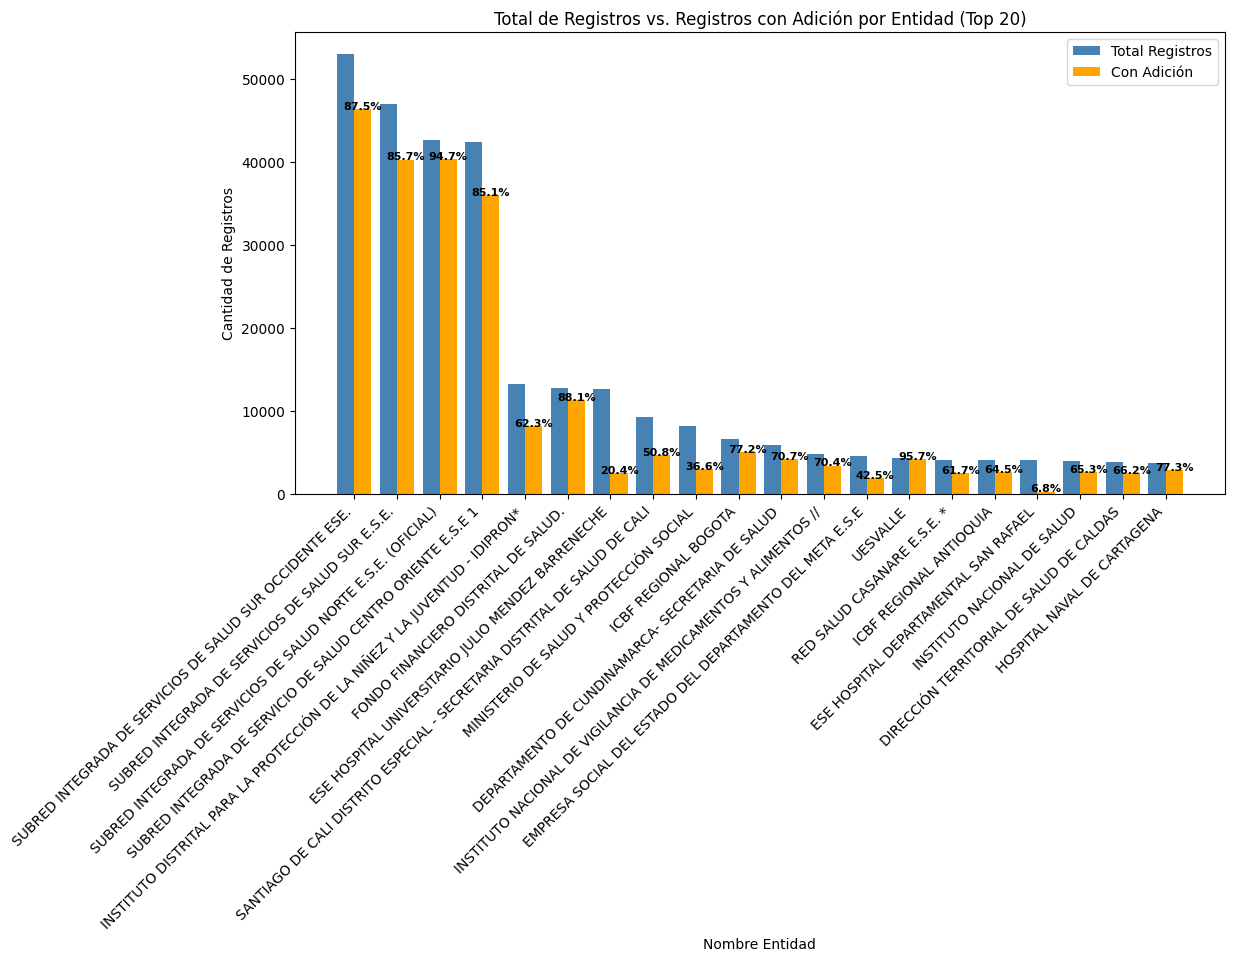

In [256]:

# Contar total de registros por entidad
total_por_entidad = df['nombre entidad'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_entidad = df[df['Adicion'] == 1]['nombre entidad'].value_counts()

# Unir ambas series en un DataFrame
df_entidades = pd.DataFrame({'Total Registros': total_por_entidad, 'Con Adición': adicion_por_entidad}).fillna(0)

# Calcular el porcentaje de adición
df_entidades["% Adición"] = (df_entidades["Con Adición"] / df_entidades["Total Registros"]) * 100

# Seleccionar las 20 entidades con más registros
top_entidades = df_entidades.nlargest(20, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_entidades))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_entidades['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_entidades['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_entidades["% Adición"]):
    ax.text(x[i] + width/2, top_entidades["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=8, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_entidades.index, rotation=45, ha="right")
ax.set_xlabel("Nombre Entidad")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Entidad (Top 20)")
ax.legend()

# Mostrar la gráfica
plt.show()



Variable departamento

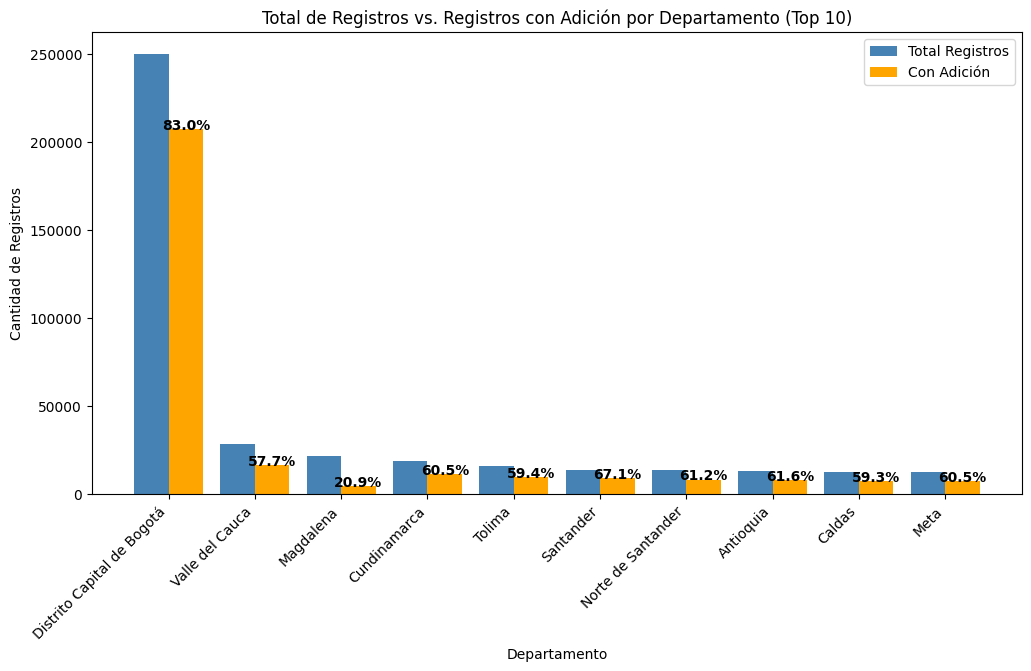

In [257]:


# Contar total de registros por departamento
total_por_departamento = df['departamento'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_departamento = df[df['Adicion'] == 1]['departamento'].value_counts()

# Unir ambas series en un DataFrame
df_departamentos = pd.DataFrame({'Total Registros': total_por_departamento, 'Con Adición': adicion_por_departamento}).fillna(0)

# Calcular el porcentaje de adición
df_departamentos["% Adición"] = (df_departamentos["Con Adición"] / df_departamentos["Total Registros"]) * 100

# Seleccionar los 10 departamentos con más registros
top_departamentos = df_departamentos.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_departamentos))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_departamentos['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_departamentos['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_departamentos["% Adición"]):
    ax.text(x[i] + width/2, top_departamentos["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_departamentos.index, rotation=45, ha="right")
ax.set_xlabel("Departamento")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Departamento (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable ciudad

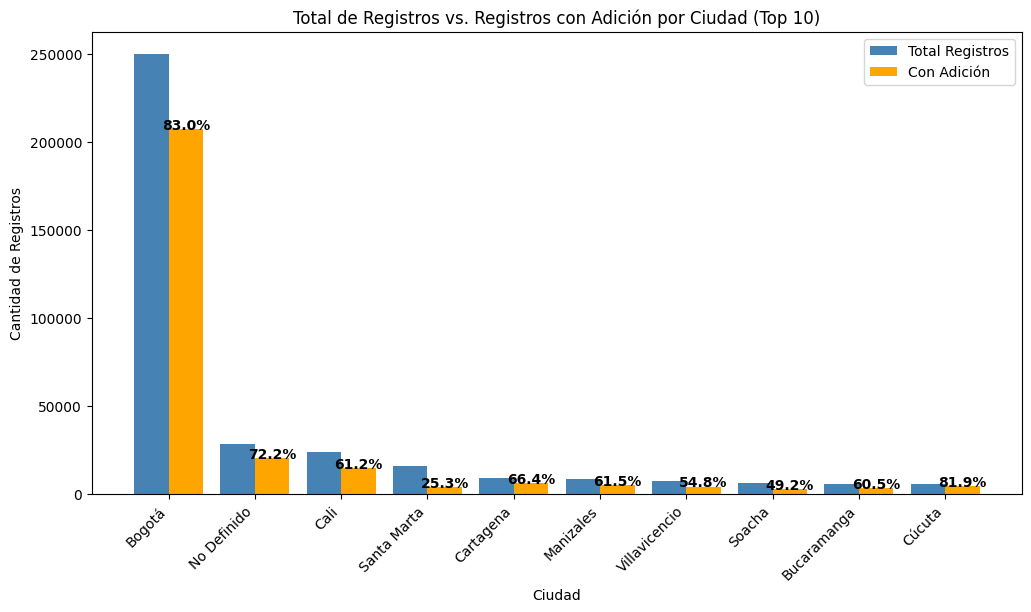

In [258]:
import matplotlib.pyplot as plt
import numpy as np

# Contar total de registros por ciudad
total_por_ciudad = df['ciudad'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_ciudad = df[df['Adicion'] == 1]['ciudad'].value_counts()

# Unir ambas series en un DataFrame
df_ciudades = pd.DataFrame({'Total Registros': total_por_ciudad, 'Con Adición': adicion_por_ciudad}).fillna(0)

# Calcular el porcentaje de adición
df_ciudades["% Adición"] = (df_ciudades["Con Adición"] / df_ciudades["Total Registros"]) * 100

# Seleccionar las 10 ciudades con más registros
top_ciudades = df_ciudades.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_ciudades))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_ciudades['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_ciudades['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_ciudades["% Adición"]):
    ax.text(x[i] + width/2, top_ciudades["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_ciudades.index, rotation=45, ha="right")
ax.set_xlabel("Ciudad")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Ciudad (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable orden

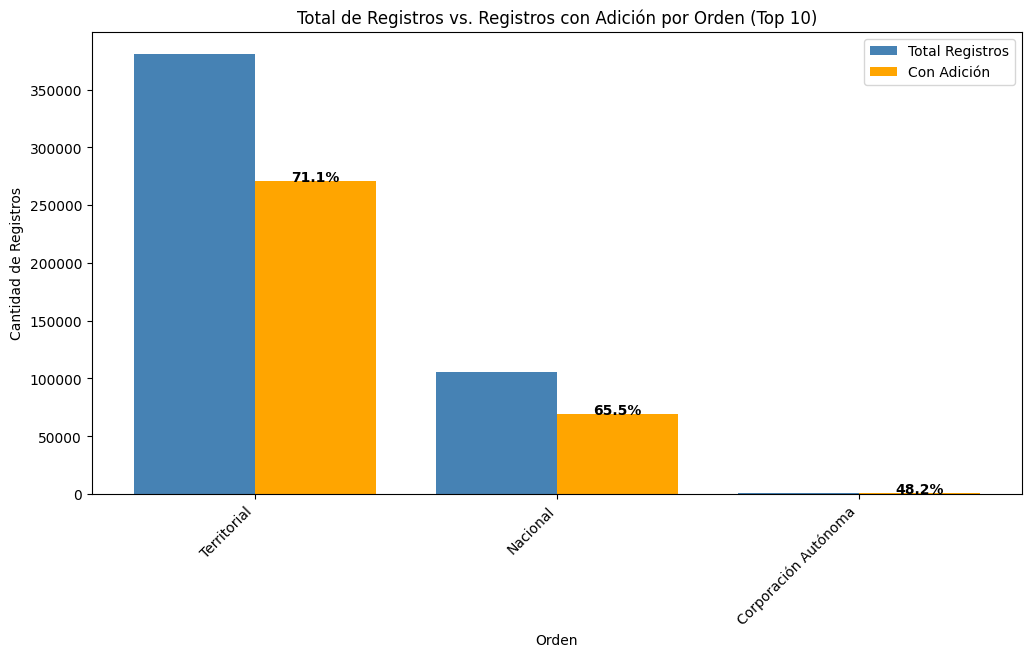

In [259]:
import matplotlib.pyplot as plt
import numpy as np

# Contar total de registros por orden
total_por_orden = df['orden'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_orden = df[df['Adicion'] == 1]['orden'].value_counts()

# Unir ambas series en un DataFrame
df_orden = pd.DataFrame({'Total Registros': total_por_orden, 'Con Adición': adicion_por_orden}).fillna(0)

# Calcular el porcentaje de adición
df_orden["% Adición"] = (df_orden["Con Adición"] / df_orden["Total Registros"]) * 100

# Seleccionar las 10 categorías con más registros
top_orden = df_orden.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_orden))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_orden['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_orden['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_orden["% Adición"]):
    ax.text(x[i] + width/2, top_orden["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_orden.index, rotation=45, ha="right")
ax.set_xlabel("Orden")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Orden (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable rama

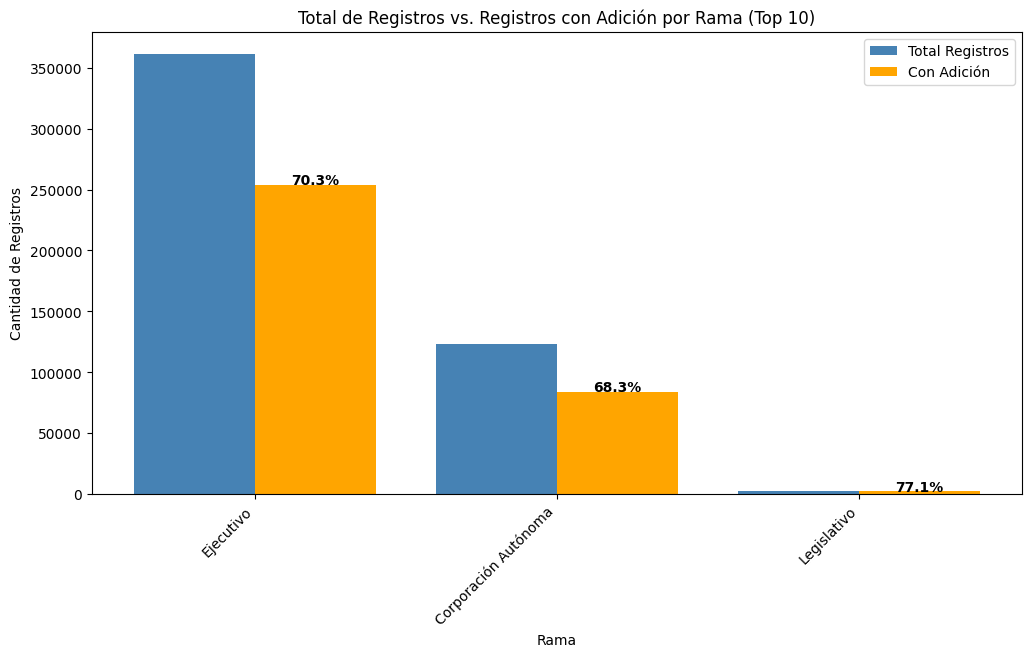

In [ ]:

# Contar total de registros por rama
total_por_rama = df['rama'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_rama = df[df['Adicion'] == 1]['rama'].value_counts()

# Unir ambas series en un DataFrame
df_rama = pd.DataFrame({'Total Registros': total_por_rama, 'Con Adición': adicion_por_rama}).fillna(0)

# Calcular el porcentaje de adición
df_rama["% Adición"] = (df_rama["Con Adición"] / df_rama["Total Registros"]) * 100

# Seleccionar las categorías con más registros
top_ramas = df_rama.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_ramas))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_ramas['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_ramas['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_ramas["% Adición"]):
    ax.text(x[i] + width/2, top_ramas["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_ramas.index, rotation=45, ha="right")
ax.set_xlabel("Rama")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Rama (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


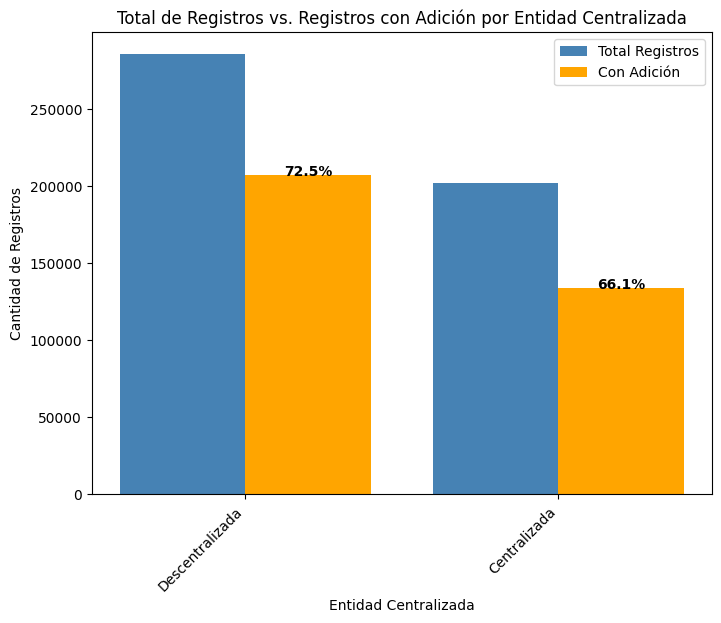

In [271]:
import matplotlib.pyplot as plt
import numpy as np

# Contar total de registros por entidad centralizada
total_por_centralizada = df['entidad centralizada'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_centralizada = df[df['Adicion'] == 1]['entidad centralizada'].value_counts()

# Unir ambas series en un DataFrame
df_centralizada = pd.DataFrame({'Total Registros': total_por_centralizada, 'Con Adición': adicion_por_centralizada}).fillna(0)

# Calcular el porcentaje de adición
df_centralizada["% Adición"] = (df_centralizada["Con Adición"] / df_centralizada["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_centralizada))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_centralizada['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_centralizada['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_centralizada["% Adición"]):
    ax.text(x[i] + width/2, df_centralizada["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_centralizada.index, rotation=45, ha="right")
ax.set_xlabel("Entidad Centralizada")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Entidad Centralizada")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable estado contrato

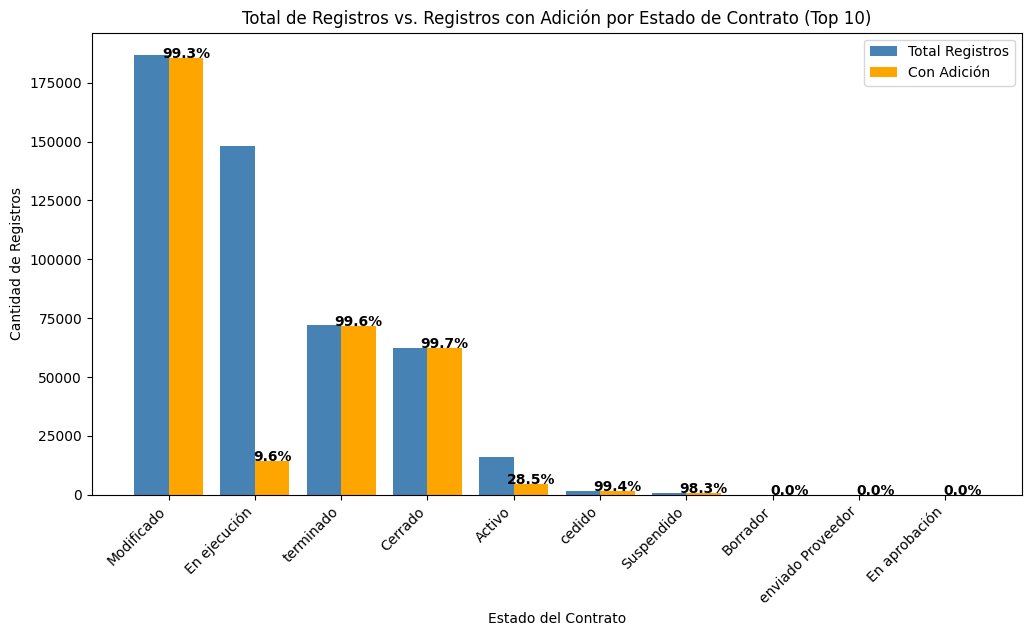

In [270]:
import matplotlib.pyplot as plt
import numpy as np

# Contar total de registros por estado contrato
total_por_estado = df['estado contrato'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_estado = df[df['Adicion'] == 1]['estado contrato'].value_counts()

# Unir ambas series en un DataFrame
df_estado = pd.DataFrame({'Total Registros': total_por_estado, 'Con Adición': adicion_por_estado}).fillna(0)

# Calcular el porcentaje de adición
df_estado["% Adición"] = (df_estado["Con Adición"] / df_estado["Total Registros"]) * 100

# Seleccionar las categorías con más registros
top_estados = df_estado.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_estados))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_estados['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_estados['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_estados["% Adición"]):
    ax.text(x[i] + width/2, top_estados["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_estados.index, rotation=45, ha="right")
ax.set_xlabel("Estado del Contrato")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Estado de Contrato (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable codigo de categoria principal

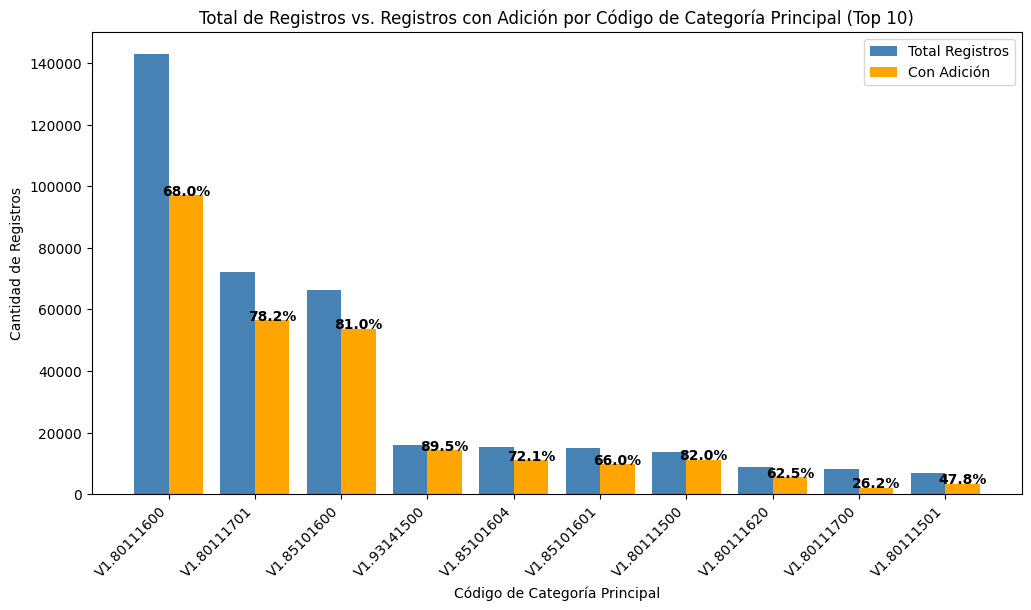

In [274]:
import matplotlib.pyplot as plt
import numpy as np

# Contar total de registros por código de categoría principal
total_por_categoria = df['codigo de categoria principal'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_categoria = df[df['Adicion'] == 1]['codigo de categoria principal'].value_counts()

# Unir ambas series en un DataFrame
df_categoria = pd.DataFrame({'Total Registros': total_por_categoria, 'Con Adición': adicion_por_categoria}).fillna(0)

# Calcular el porcentaje de adición
df_categoria["% Adición"] = (df_categoria["Con Adición"] / df_categoria["Total Registros"]) * 100

# Seleccionar las 10 categorías con más registros
top_categorias = df_categoria.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_categorias))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_categorias['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_categorias['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_categorias["% Adición"]):
    ax.text(x[i] + width/2, top_categorias["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_categorias.index, rotation=45, ha="right")
ax.set_xlabel("Código de Categoría Principal")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Código de Categoría Principal (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()




Variable tipo de contrato

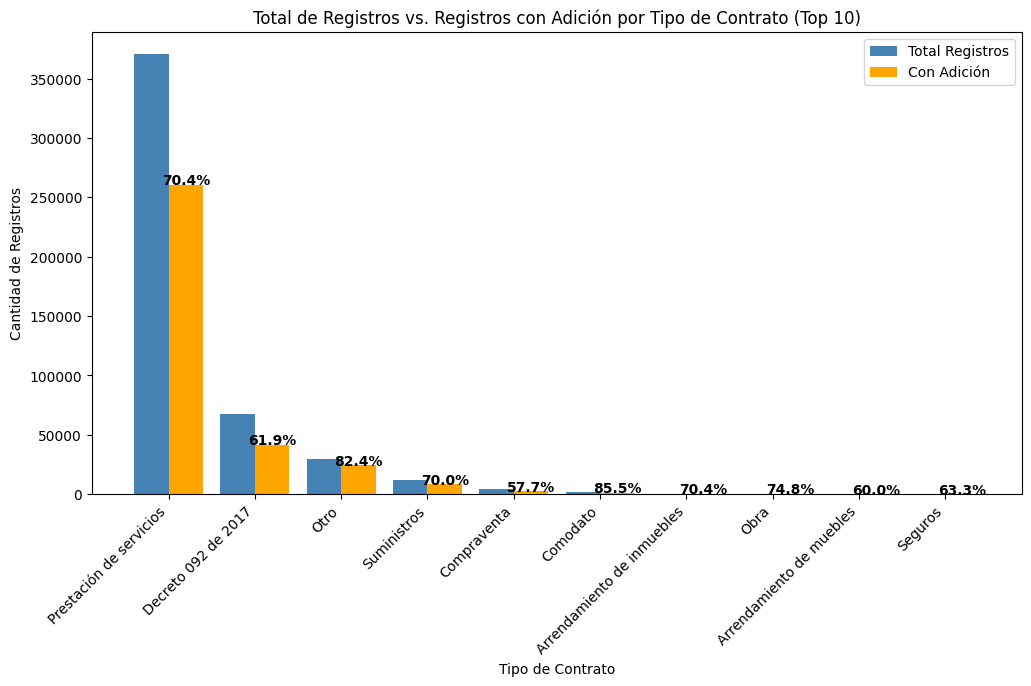

In [275]:
import matplotlib.pyplot as plt
import numpy as np

# Contar total de registros por tipo de contrato
total_por_tipo = df['tipo de contrato'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_tipo = df[df['Adicion'] == 1]['tipo de contrato'].value_counts()

# Unir ambas series en un DataFrame
df_tipo_contrato = pd.DataFrame({'Total Registros': total_por_tipo, 'Con Adición': adicion_por_tipo}).fillna(0)

# Calcular el porcentaje de adición
df_tipo_contrato["% Adición"] = (df_tipo_contrato["Con Adición"] / df_tipo_contrato["Total Registros"]) * 100

# Seleccionar los 10 tipos de contrato con más registros
top_tipos = df_tipo_contrato.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_tipos))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_tipos['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_tipos['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_tipos["% Adición"]):
    ax.text(x[i] + width/2, top_tipos["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_tipos.index, rotation=45, ha="right")
ax.set_xlabel("Tipo de Contrato")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Tipo de Contrato (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()




Variable modalidad de contratacion

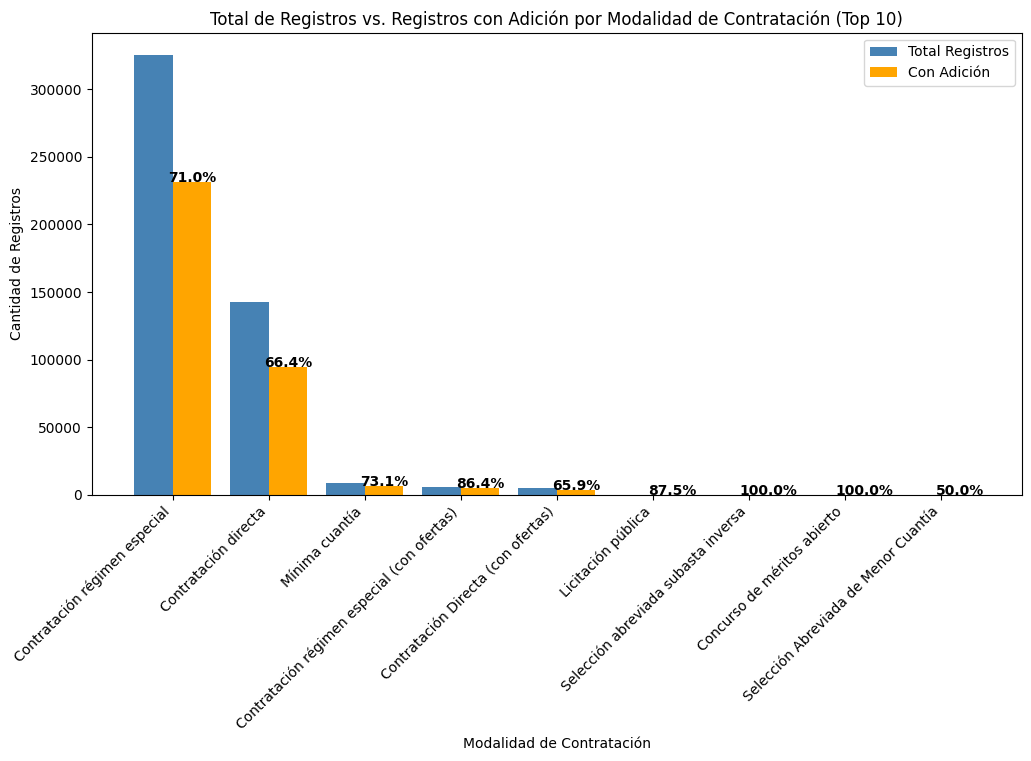

In [276]:


# Contar total de registros por modalidad de contratación
total_por_modalidad = df['modalidad de contratacion'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_modalidad = df[df['Adicion'] == 1]['modalidad de contratacion'].value_counts()

# Unir ambas series en un DataFrame
df_modalidad = pd.DataFrame({'Total Registros': total_por_modalidad, 'Con Adición': adicion_por_modalidad}).fillna(0)

# Calcular el porcentaje de adición
df_modalidad["% Adición"] = (df_modalidad["Con Adición"] / df_modalidad["Total Registros"]) * 100

# Seleccionar las 10 modalidades con más registros
top_modalidades = df_modalidad.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_modalidades))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_modalidades['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_modalidades['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_modalidades["% Adición"]):
    ax.text(x[i] + width/2, top_modalidades["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_modalidades.index, rotation=45, ha="right")
ax.set_xlabel("Modalidad de Contratación")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Modalidad de Contratación (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


### División de categoricas y númericas

In [ ]:
# Seleccionar columnas categóricas, enteras y de punto flotante
catcols = df.select_dtypes(exclude=['int64', 'float64']).columns
intcols = df.select_dtypes(include=['int64']).columns
floatcols = df.select_dtypes(include=['float64']).columns


In [ ]:
catcols

In [ ]:
#No cuentan como duplicados debido a que los contratos pueden ser parecido pero se diferencian por la entidad, id contrato, etc que ya fueron eliminados

duplicates = len(df[df.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')

In [ ]:
# número de valores perdidos
missing_values = df.isnull().sum().sum()
print(f'Number of Missing Values: {missing_values}')

In [ ]:
missing_values_per_column = df.isnull().sum()
print(missing_values_per_column)

## Selección variables importantes con metodo de xgboost y RF

In [ ]:
# Separar variables independientes y dependiente
X = df.drop('adicion', axis=1)
y = df['adicion']

In [ ]:
# Identificar columnas categóricas y numéricas
catcols = [col for col in X.columns if X[col].dtype == 'object']
numcols = [col for col in X.columns if col not in catcols]

# Codificar las columnas categóricas
label_encoders = {}
for col in catcols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].fillna('Desconocido').astype(str))
    label_encoders[col] = le



### Random Forest

In [ ]:
# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Obtener las importancias y almacenarlas en un DataFrame
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
})
# Ordenar por importancia de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Seleccionar las 10 más importantes
top_10_features_random = feature_importance_df.head(10)

# Mostrar el resultado
print("Las 10 variables con RF más importantes son:")
print(top_10_features_random)


### XGBOOST

In [ ]:
# Entrenar el modelo XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X, y)

# Obtener las importancias de las variables
importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
})

# Ordenar por importancia de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Seleccionar las 10 más importantes
top_10_features_xgboost = feature_importance_df.head(10)

# Mostrar el resultado
print("Las 10 variables con xgboost más importantes son:")
print(top_10_features_xgboost)

### Listado final y generacion de df

In [ ]:
# Lista de variables importantes que quieres conservar
variables_importantes = ["estado contrato", "anno bpin", "estado bpin","destino gasto","orden","ciudad","tiempo duracion (dias)","obligación ambiental","recursos_propios_alcaldias_gobernaciones_resguardos","justificacion modalidad de contratacion"] 
variables_importantes.append("adicion")
# Eliminar todas las columnas excepto las de la lista 'variables_importantes'
df_importantes = df[variables_importantes]


In [ ]:
df_importantes

## Dummies

In [ ]:
catcols2=[]
for i in catcols:
    if i in variables_importantes:
        catcols2.append(i)

In [ ]:
catcols2

In [ ]:

# Codificación de variables categóricas
df_dummies = pd.get_dummies(df_importantes, columns=catcols2, dtype=int, drop_first=True)

# Identificar las categorías excluidas
excluded_categories = {}
for col in catcols2:
    unique_values = df_importantes[col].unique()
    excluded_categories[col] = unique_values[0]  # La primera categoría es la excluida

# Mostrar las categorías excluidas
print("Categorías excluidas por multicolinealidad:")
for col, category in excluded_categories.items():
    print(f"{col}: {category}")

# Visualizar el DataFrame con variables dummies
df_dummies


In [ ]:


cols = [col for col in df_dummies.columns if col != "adicion"] + ["adicion"]
df_dummies = df_dummies[cols]

# Mostrar el DataFrame con la columna 'adiciones' al final
df_dummies.head()


## Limpieza datos atipicos, etc

In [ ]:
X=df_dummies
var_ret=[]
for i in X.columns:
    if X[i].sum() <6068: #se eliminan columnas que tengan más de 95% de datos iguales 2260 es el 5% de la cantidad total de datos
         var_ret.append(i)

# Eliminar las columnas del dataframe
df_dummies.drop(columns=var_ret, inplace=True)


print(var_ret)
print(len(var_ret))


df_dummies.columns

In [ ]:
df_dummies